<a href="https://colab.research.google.com/github/MirandaCarou/Quantum_Algorithims_Programming/blob/main/QPE_MirandaCarou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Miranda Carou Laiño**

In [ ]:
!pip install qiskit qiskit-aer pylatexenc --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e55ff18459e5132fed3b8befcc8957c010ff0303ac6bbfebcf1bc13180ad93fa
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


# Lab QPE

Create a small notebook where you:
1. Implement a QPE for an U operator you design yourself. It is better if it is not a trivial one.
2. Use the QPE implementation of Qiskit to calculate its eigenvalues.
3. Check and discuss why the output you get is the right one. You can verify the outputs doing the calculations by hand or using numpy code.

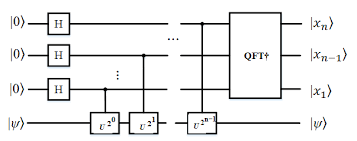

In [ ]:
import numpy as np
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import QFT
from qiskit.circuit.library.phase_estimation import PhaseEstimation
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import Counts

def measure_qpe(qc):
    sim = AerSimulator()
    shots = 2000
    results=sim.run(qc,shots=shots).result()
    answer = results.get_counts()
    display(plot_histogram(answer, figsize=(11,5)))
    return answer

def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

def obten_unitaria(qcirc):
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    return unitary

def compute_eigenvalues_and_phases(unitary_matrix):
    eigenvalues, _ = np.linalg.eig(unitary_matrix)
    phases = np.angle(eigenvalues)/(2*np.pi)

    return eigenvalues, phases

In [ ]:
def measure_qpe(qc):
    sim = AerSimulator()
    shots = 2000
    results=sim.run(qc,shots=shots).result()
    answer = results.get_counts()
    display(plot_histogram(answer, figsize=(11,5)))

Creamos una función que te devuelve un operador unitario no trivial.

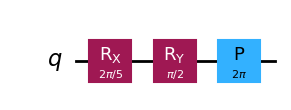

In [16]:
def U(t):
  qc = QuantumCircuit(t)
  qc.rx(2 * np.pi / 5, 0)
  qc.ry(2 * np.pi / 4, 0)
  qc.p(2 * np.pi, 0)
  #qc.save_unitary()
  return qc

U_cc = U(1)
U_cc.draw('mpl')

Obtenemos su matriz unitaria

In [15]:
U_c = obten_unitaria(U_cc)
#Esto va a fallar si no le descomentas la "save_unitary",
#pero depues tienes que reejecutar sin ella apra que no te rompa el resto
display(U_c.draw('latex', prefix="U = "))

<IPython.core.display.Latex object>

Calculamos autovalores y fases teóricas

In [17]:
eigenvalues, phases = compute_eigenvalues_and_phases(U_c)
print("Eigenvalues:")
print(eigenvalues)
print()
print("Phases:")
print(phases)

Eigenvalues:
[0.5720614+0.8202108j 0.5720614-0.8202108j]

Phases:
[ 0.15307195 -0.15307195]


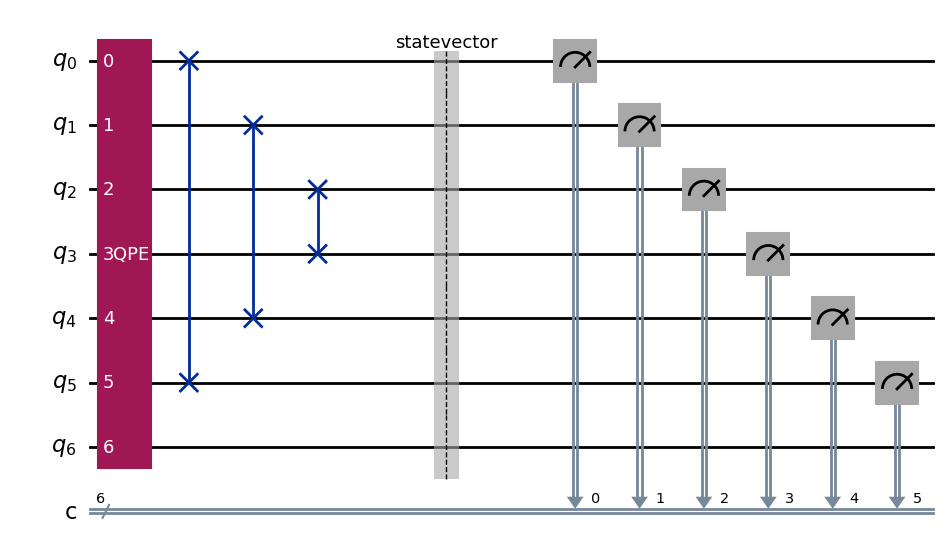

In [18]:
t = 6

def qpe(t):
  qc = QuantumCircuit(t + 1, t)
  u_circuit = U(1)
  qc.append(PhaseEstimation(t, u_circuit, iqft=None, name='QPE'), range(t+1))
  for i in range(t//2):
      qc.swap(i,t-i-1)
  qc.save_statevector()
  qc.measure(range(t), range(t))
  return qc


qpe_1 = qpe(t)
qpe_1.draw('mpl')



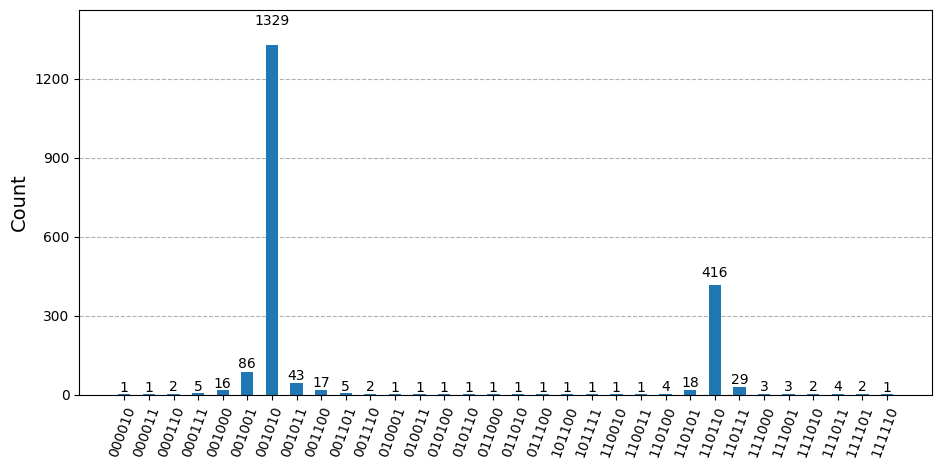

In [19]:
sim = AerSimulator()
shots = 2000
results=sim.run(qpe_1.decompose().decompose().decompose().decompose(),shots=shots).result()
answer = results.get_counts()
statevector = results.get_statevector()
display(plot_histogram(answer, figsize=(11,5)))

In [20]:
phases = []
for bitstring, count in answer.items():
    decimal = int(bitstring, 2)
    phase = decimal / (2 ** t)
    phases.append((bitstring, phase, count))
    phases = sorted(phases, key=lambda x: -x[2])[:3]

for bitstring, phase, count in phases:
    print(f"Bitstring: {bitstring}, Phase: {phase:.6f}, Count: {count}")


Bitstring: 001010, Phase: 0.156250, Count: 1329
Bitstring: 110110, Phase: 0.843750, Count: 416
Bitstring: 001001, Phase: 0.140625, Count: 86


----

Efectivamente, al comparar estos resultados con los resultados del cálculo de fases de la matriz unitaria utilizando numpy, observamos como el valor 10 devuelve un valor altamente cercano al resultado teórico. Este valor corresponde a realizar $10/2^6 = 0.1562$.

Vamos a intentar buscar una mayor precisión aumentando el numeros de qubits de evaluación.

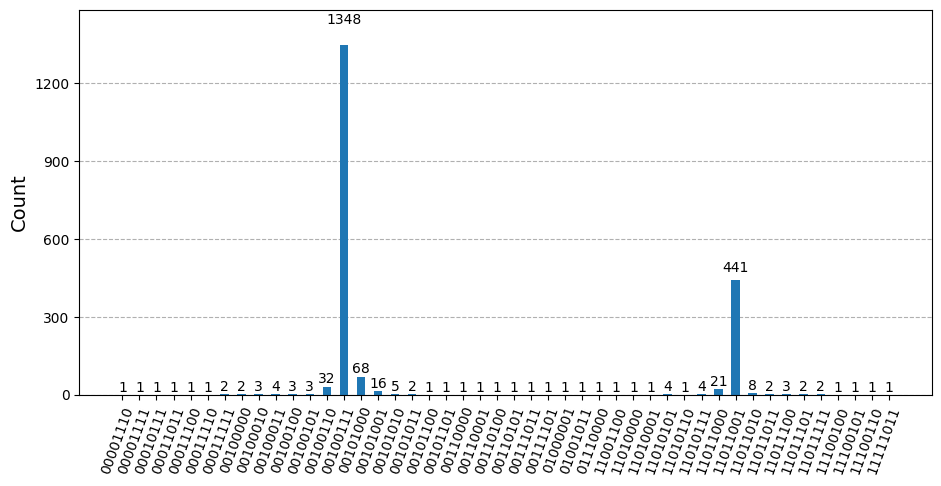

Bitstring: 00100111, Phase: 0.152344, Count: 1348
Bitstring: 11011001, Phase: 0.847656, Count: 441
Bitstring: 00101000, Phase: 0.156250, Count: 68


In [21]:
t = 8
qpe_2 = qpe(t)

sim = AerSimulator()
shots = 2000
results=sim.run(qpe_2.decompose().decompose().decompose().decompose(),shots=shots).result()
answer = results.get_counts()
statevector = results.get_statevector()
display(plot_histogram(answer, figsize=(11,5)))

phases = []
for bitstring, count in answer.items():
    decimal = int(bitstring, 2)
    phase = decimal / (2 ** t)
    phases.append((bitstring, phase, count))
    phases = sorted(phases, key=lambda x: -x[2])[:3]

for bitstring, phase, count in phases:
    print(f"Bitstring: {bitstring}, Phase: {phase:.6f}, Count: {count}")

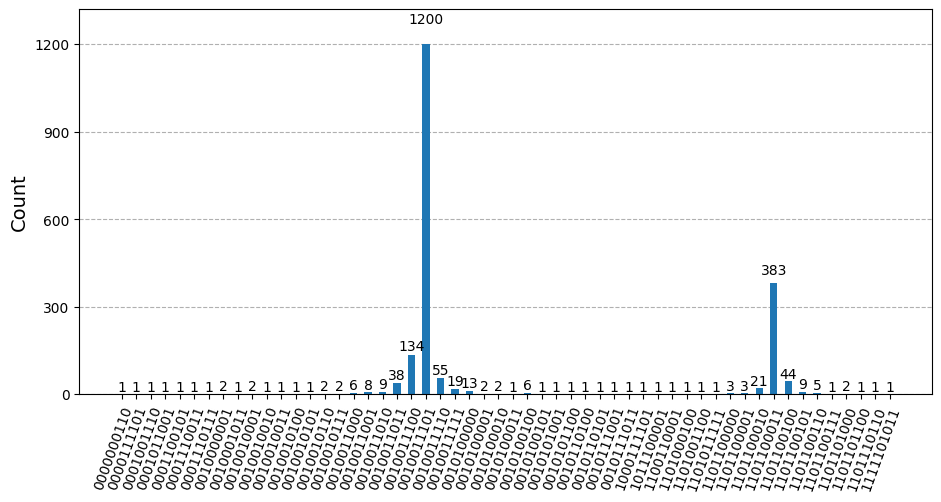

Bitstring: 0010011101, Phase: 0.153320, Count: 1200
Bitstring: 1101100011, Phase: 0.846680, Count: 383
Bitstring: 0010011100, Phase: 0.152344, Count: 134


In [22]:
t = 10
qpe_3 = qpe(t)

sim = AerSimulator()
shots = 2000
results=sim.run(qpe_3.decompose().decompose().decompose().decompose(),shots=shots).result()
answer = results.get_counts()
statevector = results.get_statevector()
display(plot_histogram(answer, figsize=(11,5)))

phases = []
for bitstring, count in answer.items():
    decimal = int(bitstring, 2)
    phase = decimal / (2 ** t)
    phases.append((bitstring, phase, count))
    phases = sorted(phases, key=lambda x: -x[2])[:3]

for bitstring, phase, count in phases:
    print(f"Bitstring: {bitstring}, Phase: {phase:.6f}, Count: {count}")

---

Al aumenar el número de qubits de evaluación podemos obtener una mayor precision, llegando a prácticamente tener el valor excto para $t= 10$.

En cambio si ahora probamos con un número muy pequeño de qubits de evaluación podemos observar como decae la precisión de los resultados

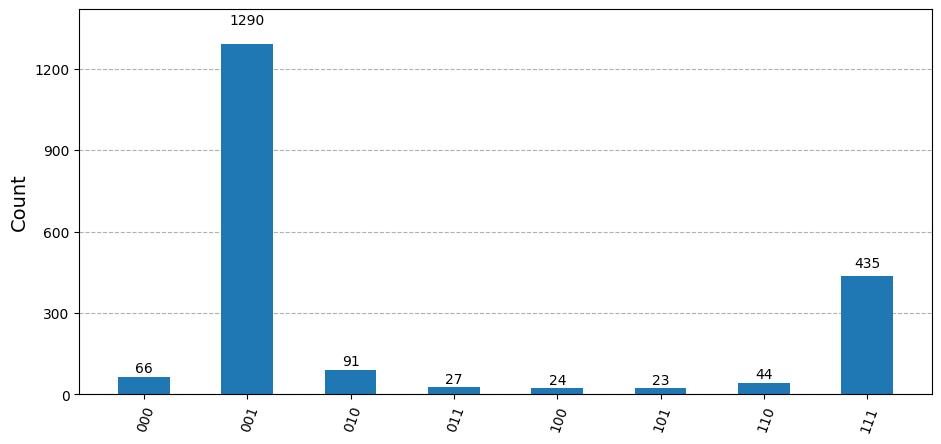

Bitstring: 001, Phase: 0.125000, Count: 1290
Bitstring: 111, Phase: 0.875000, Count: 435
Bitstring: 010, Phase: 0.250000, Count: 91


In [23]:
t = 3
qpe_3 = qpe(t)

sim = AerSimulator()
shots = 2000
results=sim.run(qpe_3.decompose().decompose().decompose().decompose(),shots=shots).result()
answer = results.get_counts()
statevector = results.get_statevector()
display(plot_histogram(answer, figsize=(11,5)))

phases = []
for bitstring, count in answer.items():
    decimal = int(bitstring, 2)
    phase = decimal / (2 ** t)
    phases.append((bitstring, phase, count))
    phases = sorted(phases, key=lambda x: -x[2])[:3]

for bitstring, phase, count in phases:
    print(f"Bitstring: {bitstring}, Phase: {phase:.6f}, Count: {count}")

---

Efectivamente, la precisión ha decaido en gran medida.

---

***Resumen de resultados:***

**Resultado teórico:**  $0.15307195$

Resultado experimental ( $t = 7$ ): $0.156250$

Resultado experimental ( $t = 8$ ): $0.152344$

Resultado experimental ( $t = 10$ ): $0.153320$

Resultado experimental ( $t = 3$ ): $0.125000$

Hablando con mis compañeros, no teníamos claro si tambien teniamos que incluir una versión hecha por nosotros de un circuito QPE y comparar resultados. Por si acaso yo lo hice y efectivamente podemos observar que para $t = 10$ en la versión creada por mí, da el mismo resultado que en la importada de qiskit :)


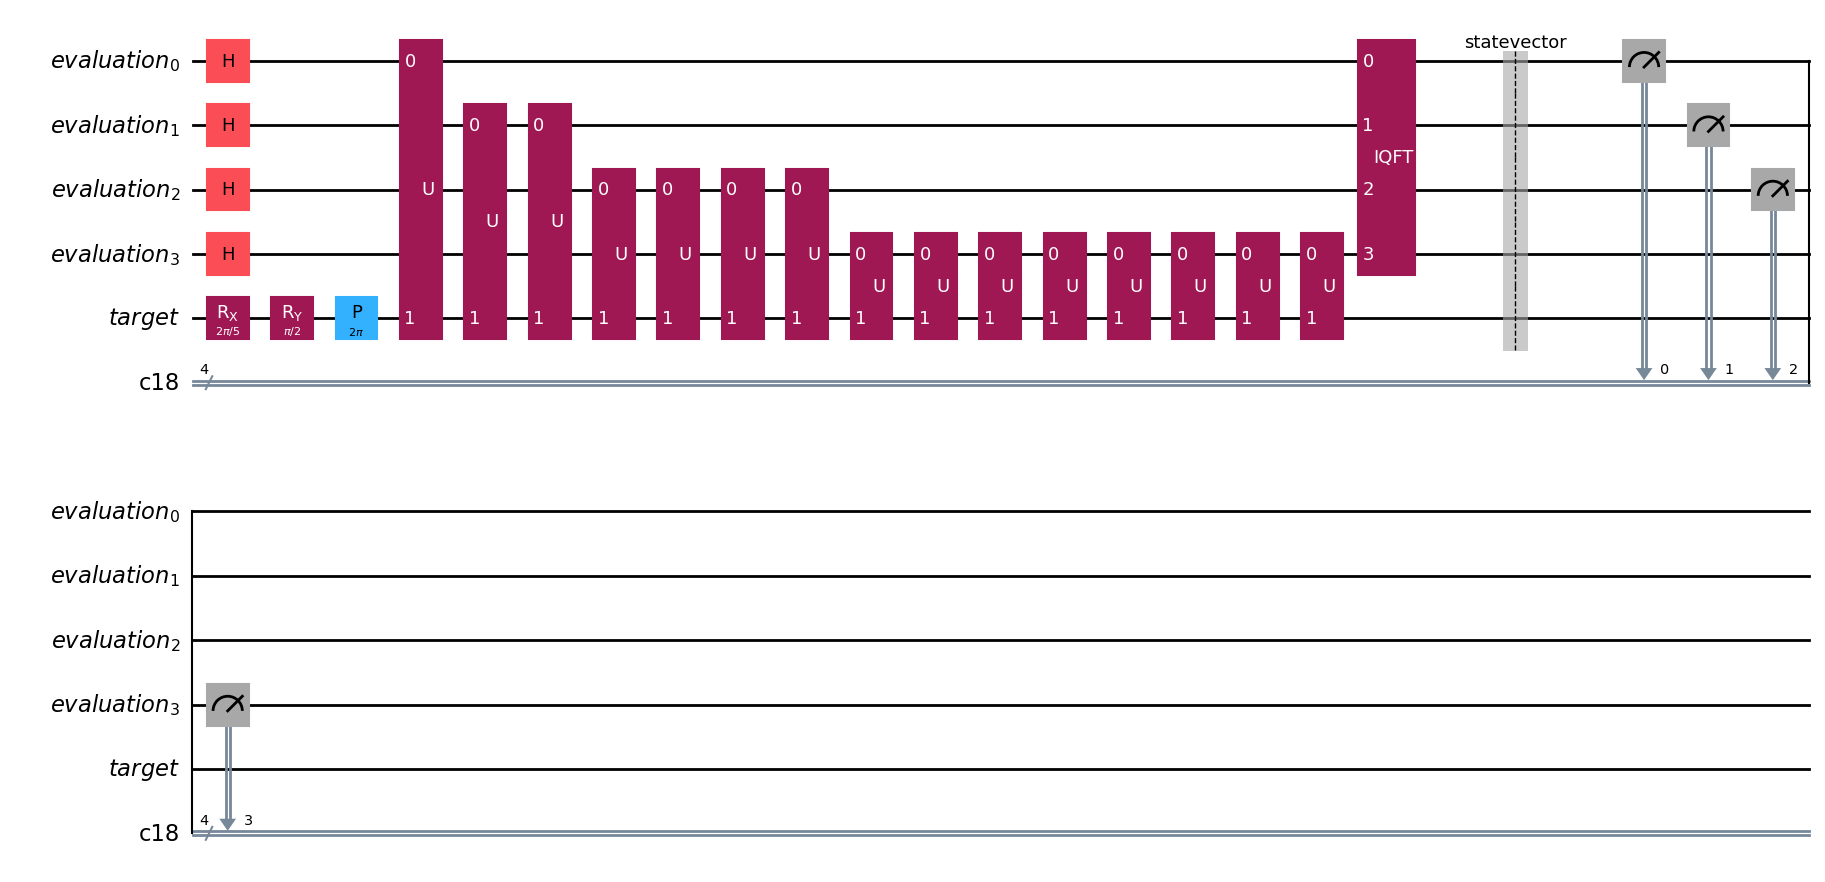

In [49]:
def own_qpe(u, n):
    t = QuantumRegister(n, name="evaluation")
    target = QuantumRegister(1, name="target")
    c = ClassicalRegister(n)
    qc = QuantumCircuit(t, target, c)

    qc.h(t)
    qc.compose(u, qubits=target, inplace=True)

    for i in range(n):
        controlled_unitary = u.control(1)
        controlled_unitary.name = 'U'
        for j in range(2 ** i):
            qc.append(controlled_unitary, [i, target[0]])

    qft_dagger = QFT(n, inverse=True).to_instruction()
    qc.append(qft_dagger, t)

    qc.save_statevector()
    qc.measure(t, c)

    return qc

u_c = U(1)
circuit = own_qpe(u_c, 4)
circuit.draw('mpl')

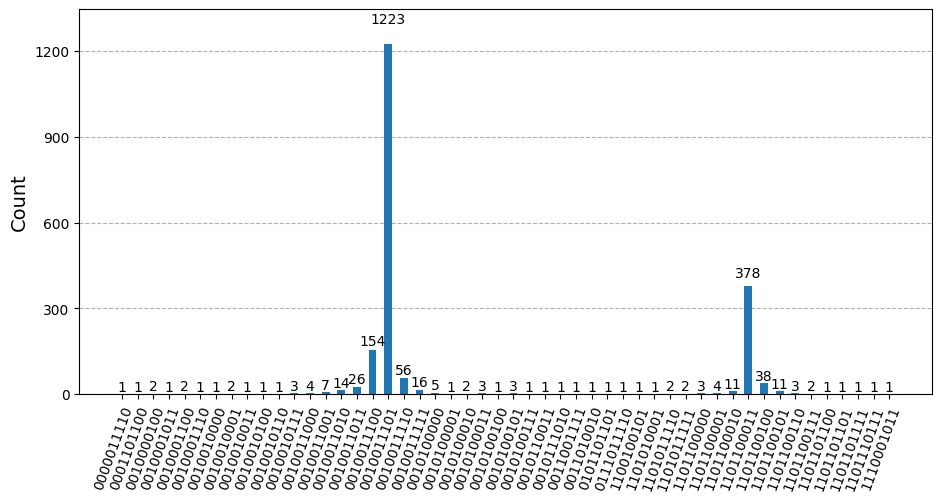

Bitstring: 0010011101, Phase: 0.153320, Count: 1223
Bitstring: 1101100011, Phase: 0.846680, Count: 378
Bitstring: 0010011100, Phase: 0.152344, Count: 154


In [50]:
t = 10
unitary_o = U(1)
qpe_own_1 = own_qpe(unitary_o, t)

sim = AerSimulator()
shots = 2000
results=sim.run(qpe_own_1.decompose().decompose().decompose().decompose(),shots=shots).result()
answer = results.get_counts()
statevector = results.get_statevector()
display(plot_histogram(answer, figsize=(11,5)))

phases = []
for bitstring, count in answer.items():
    decimal = int(bitstring, 2)
    phase = decimal / (2 ** t)
    phases.append((bitstring, phase, count))
    phases = sorted(phases, key=lambda x: -x[2])[:3]

for bitstring, phase, count in phases:
    print(f"Bitstring: {bitstring}, Phase: {phase:.6f}, Count: {count}")